In [67]:
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from mlxtend.evaluate import plot_decision_regions

from matplotlib import pyplot as plt
%matplotlib inline

## Total and explained variance

In [35]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [37]:
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [99]:
cov_mat = np.cov(X_train_std, rowvar=0) # hmmmmmm
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues\n%s' % eigen_vals)


Eigenvalues
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.33051429  0.08414846  0.29595018  0.16831254  0.21432212
  0.2399553 ]


In [100]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

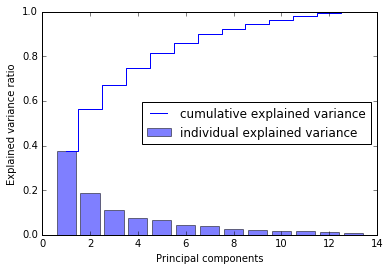

In [101]:
plt.bar(range(1, 14), var_exp, alpha=.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

## Feature transformation

In [102]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [103]:
w = np.c_[eigen_pairs[0][1], eigen_pairs[1][1]]
print('Matrix W:\n', w)

Matrix W:
 [[-0.14669811  0.50417079]
 [ 0.24224554  0.24216889]
 [ 0.02993442  0.28698484]
 [ 0.25519002 -0.06468718]
 [-0.12079772  0.22995385]
 [-0.38934455  0.09363991]
 [-0.42326486  0.01088622]
 [ 0.30634956  0.01870216]
 [-0.30572219  0.03040352]
 [ 0.09869191  0.54527081]
 [-0.30032535 -0.27924322]
 [-0.36821154 -0.174365  ]
 [-0.29259713  0.36315461]]


In [104]:
X_train_std[0].dot(w)

array([-2.59891628,  0.00484089])

In [105]:
X_train_pca = X_train_std.dot(w)

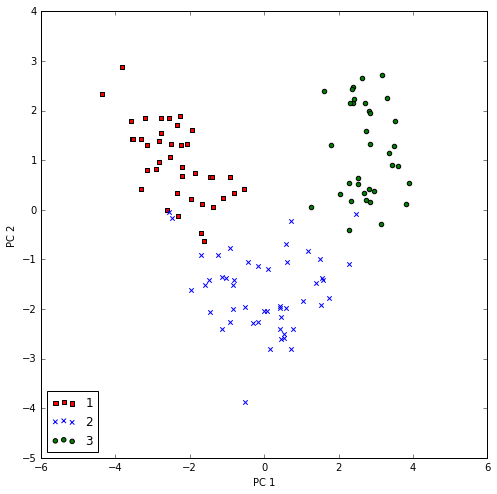

In [106]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

_ = plt.figure(figsize=(8, 8))
for l, c, m in zip(np.unique(y_train), colors, markers): # estranho dar unique quando sei -> se o dataset tiver oo registros rs
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')

## Principal componente analysis in scikit-learn

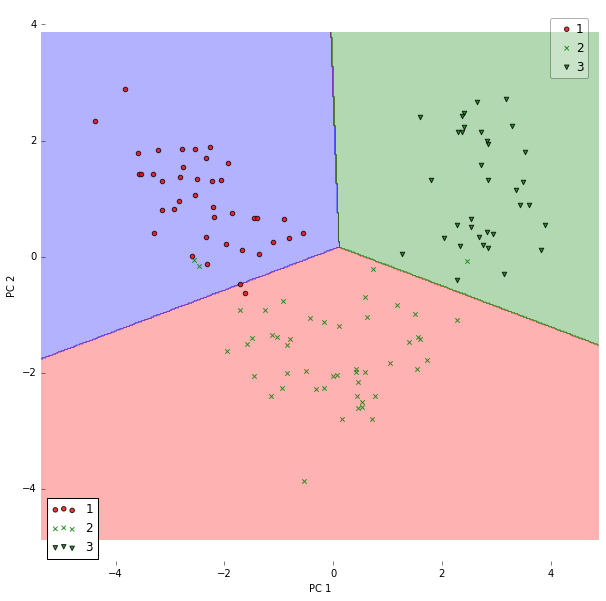

In [107]:
pca = PCA(n_components=2)
lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

_, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_decision_regions(X_train_pca, y_train, lr, ax=ax, colors='blue,red,green,yellow', markers='oxv')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
# duno pq os símbolos do 2 e 3 estão com mesma cor...

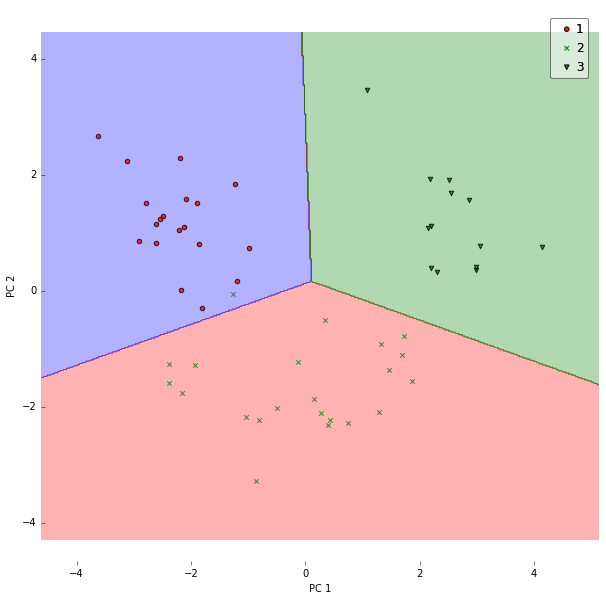

In [111]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_decision_regions(X_test_pca, y_test, lr, ax=ax, colors='blue,red,green,yellow', markers='oxv')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [112]:
# explained variance ration
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

<Container object of 13 artists>

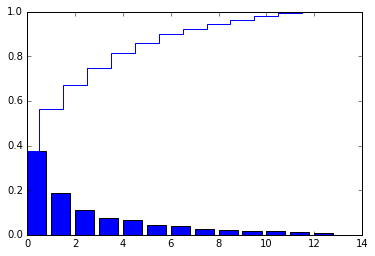

In [114]:
plt.step(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

## Supervised data compression via linear discriminant analysis